# Spam E-mail Detection

Name - Harsh Amish Shah

### The project is to predict spam emails. We will be importing the data, processing it and implementing machine learning models on it. Then we will check the accuracy of our models.

# Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the csv file into a Pandas DataFrame

In [2]:
mail=pd.read_csv("spam.csv")

In [3]:
mail.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
mail

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Analyzing the data

In [5]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
mail.shape

(5572, 2)

In [7]:
mail.columns

Index(['Label', 'EmailText'], dtype='object')

# Pre-processing the data

In [8]:
# Check for duplicates and remove
mail.drop_duplicates(inplace=True)

In [9]:
mail.shape

(5169, 2)

# Checking for NULL values

In [10]:
mail.isnull().sum()

Label        0
EmailText    0
dtype: int64

In [11]:
# Converting ham to 0 and spam to 1 in labels column
# Ham is nothing but s non spam mail.
mail['Label'].replace({'ham':0,'spam':1},inplace=True)

In [12]:
mail.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Graphical Representation of data

<AxesSubplot:>

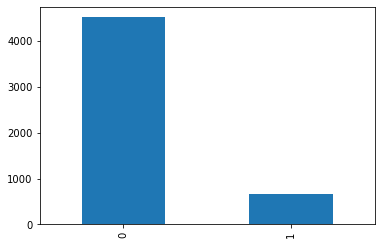

In [13]:
mail['Label'].value_counts().plot(kind='bar')

# Removing punctuations, stopwords and tokenization

In [14]:
import string
from nltk.corpus import stopwords
def process_text(text):
    # Removing any characters
    nonpunc=[char for char in text if char not in string.punctuation]
    nonpunc=''.join(nonpunc)
    
    # Converting to lower case and removing all the stopwords
    clean_words=[word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words

In [16]:
mail['EmailText'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: EmailText, dtype: object

# Converting the words into their frquency count  

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow=CountVectorizer(analyzer=process_text).fit_transform(mail['EmailText'])


# Splitting into train and test data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(messages_bow, mail['Label'], test_size=0.20, random_state=0)

In [19]:
messages_bow.shape

(5169, 11304)

# Naive Bayes Classifier Model

In [20]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train,Y_train)

In [21]:
# Print prediction
print(classifier.predict(X_train))
# Print Values
print(Y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Evaluation of training dataset

In [22]:
# Evaluate the model on training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred=classifier.predict(X_train)
print(classification_report(Y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135



In [23]:
confusion_matrix(Y_train,pred)

array([[3623,    8],
       [  11,  493]], dtype=int64)

In [24]:
accuracy_score(Y_train,pred)

0.9954050785973397

# Evaluation on testing dataset

In [25]:
# Print prediction
print(classifier.predict(X_test))
# Print Values
print(Y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [26]:
# Evaluate the model on training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred=classifier.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [27]:
confusion_matrix(Y_test,pred)

array([[850,  35],
       [ 11, 138]], dtype=int64)

In [28]:
accuracy_score(Y_test,pred)

0.9555125725338491

# Training and testing on KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Initialize and Train  KNN Classifier
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [31]:
pred2 = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [33]:
print('Confusion Matrix')
print(confusion_matrix(Y_test,pred2))
print(accuracy_score(Y_test,pred2))

Confusion Matrix
[[885   0]
 [111  38]]
0.8926499032882012


In [34]:
print('Classification Report')
print(classification_report(Y_test,pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [35]:
# Here we will check Error for k value in range of 1 to 40
error_rate= []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error=np.mean(pred_i == Y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error_rate')

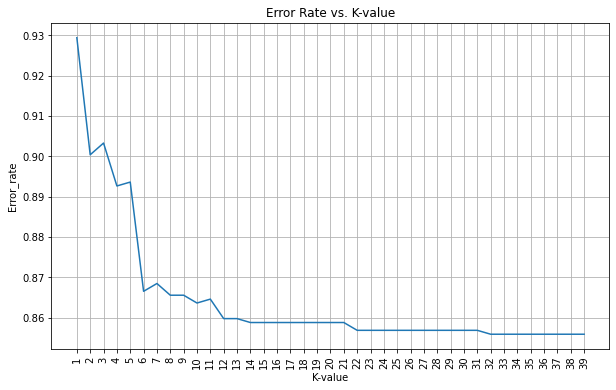

In [36]:
# Plot of Error vs K-value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.title("Error Rate vs. K-value")
plt.xticks(list(range(1,40)),rotation=90)
plt.grid()

plt.xlabel('K-value')
plt.ylabel('Error_rate')

### As we can see, accuracy is best for k-value 1

In [37]:
# Initialize and Train  KNN Classifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
pred2 = knn.predict(X_test)

In [39]:
print('Confusion Matrix')
print(confusion_matrix(Y_test,pred2))
print(accuracy_score(Y_test,pred2))

Confusion Matrix
[[885   0]
 [ 73  76]]
0.9294003868471954


In [40]:
print('Classification Report')
print(classification_report(Y_test,pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034



# Conclusion

### As we can observe from the above results, naive bayes model gives higher accuracy score than KNN Classifier.